# Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

## Goals of the Case Study

- You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#impoting libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows=300
pd.options.display.max_columns=300

In [2]:
house =  pd.read_csv('train.csv')

## Data Understanding 

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.shape

(1460, 81)

In [5]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
house.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [10]:
#checking values count 
house.PoolQC.value_counts()
house.Alley.value_counts()
house.Street.value_counts()
house.Utilities.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

## Data Preperation

In [11]:
# Checking the percentage of Null values
df_missing=pd.DataFrame((round(100*(house.isnull().sum()/len(house.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [12]:
# Treating the NA values
house['Alley'].fillna('No alley access', inplace=True)
house['BsmtQual'].fillna('No Basement', inplace=True)
house['BsmtCond'].fillna('No Basement', inplace=True)
house['BsmtExposure'].fillna('No Basement', inplace=True)
house['BsmtFinType1'].fillna('No Basement', inplace=True)
house['BsmtFinType2'].fillna('No Basement', inplace=True)
house['FireplaceQu'].fillna('No Fireplace', inplace=True)
house['GarageType'].fillna('No Garage', inplace=True)
house['GarageFinish'].fillna('No Garage', inplace=True)
house['GarageQual'].fillna('No Garage', inplace=True)
house['GarageCond'].fillna('No Garage', inplace=True)
house['PoolQC'].fillna('No Pool', inplace=True)
house['Fence'].fillna('No Fence', inplace=True)
house['MiscFeature'].fillna('None', inplace=True)

In [13]:
# impute other missing values
house['LotFrontage'].fillna(house['LotFrontage'].median(), inplace=True)
house['MasVnrType'].fillna('None', inplace=True)
house['MasVnrArea'].fillna(0.0, inplace=True) # fill value corresponding to MasVnrType=='None'
house['Electrical'].fillna(house['Electrical'].mode(), inplace=True)
house['GarageYrBlt'].fillna(9999, inplace=True) # fill dummy year value for No Garage

In [14]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
house.Id.nunique()

1460

## Performing EDA

In [16]:
continous_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
ordinal_vars = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 
                'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                'GarageCars', 'YrSold']
categorical_vars = [col for col in house.columns if col not in ['Id'] + continous_vars + ordinal_vars]

In [17]:
house[continous_vars].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


In [18]:
# Checkig for outlinear
for col in continous_vars:
    df_outlier = house.loc[house[col] > np.percentile(house[col], 99)]
    print(f'{col}: {len(df_outlier)}')

LotFrontage: 15
LotArea: 15
MasVnrArea: 15
BsmtFinSF1: 15
BsmtFinSF2: 15
BsmtUnfSF: 15
TotalBsmtSF: 15
1stFlrSF: 15
2ndFlrSF: 15
LowQualFinSF: 14
GrLivArea: 15
GarageArea: 15
WoodDeckSF: 15
OpenPorchSF: 15
EnclosedPorch: 15
3SsnPorch: 13
ScreenPorch: 15
PoolArea: 7
MiscVal: 14
SalePrice: 15


In [19]:
for col in continous_vars:
    house = house.loc[house[col] <= np.percentile(house[col], 99)]
    
house.shape

(1199, 81)

<AxesSubplot:>

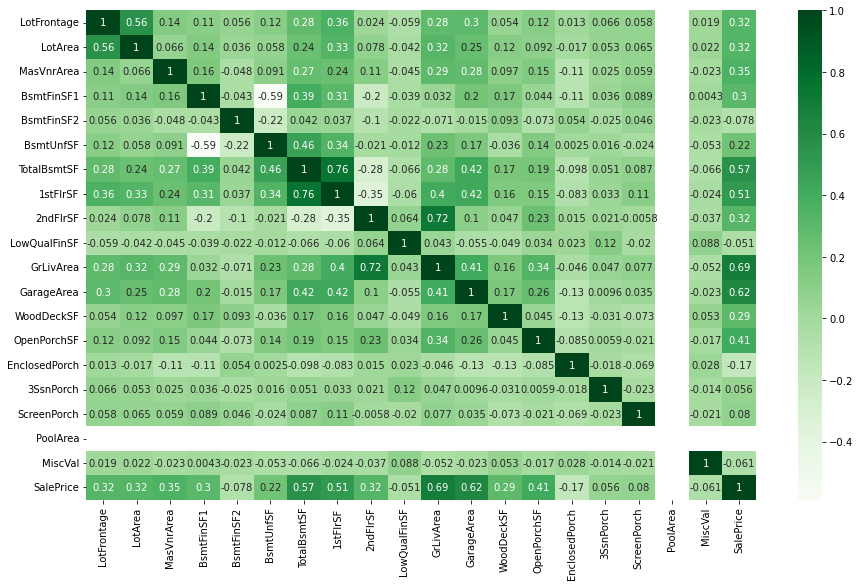

In [20]:
# check correlation
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(house[continous_vars].corr(), cmap='Greens', annot=True, ax=ax)

TotalBsmtSF and 1stFlrSF are highly correlated. We may have to drop one of these.

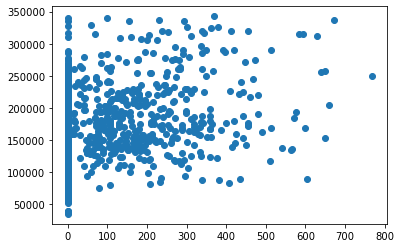

In [21]:
plt.scatter(house.MasVnrArea,house.SalePrice)

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Veneer Area')

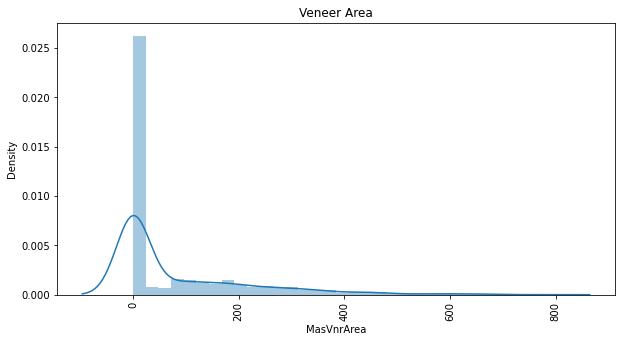

In [22]:
plt.figure(figsize = (10,5))
sns.distplot(house['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

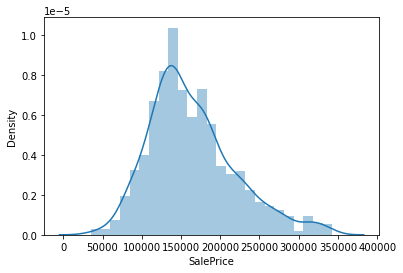

In [23]:
sns.distplot(house['SalePrice'])

In [24]:
print("Skewness: %f" % house['SalePrice'].skew())
print("Kurtosis: %f" % house['SalePrice'].kurt())

Skewness: 0.764887
Kurtosis: 0.517332


Text(0.5, 1.0, 'Overall Condition')

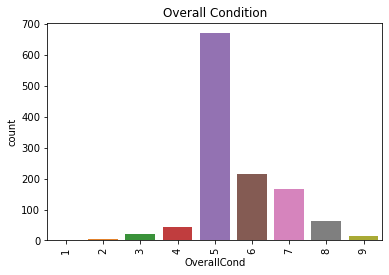

In [25]:
sns.countplot(x='OverallCond', data= house).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

<AxesSubplot:xlabel='SalePrice'>

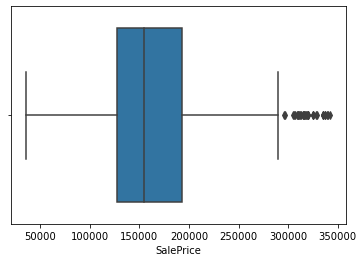

In [26]:
sns.boxplot(x='SalePrice', data=house)

In [27]:
# create copy
house_modeling = house.copy()

# convert categorical vars to one-hot
ohe_categorical_vars = []
categorical_vars_with_na = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
categorical_vars_without_na = [col for col in categorical_vars if col not in categorical_vars_with_na]

for col in categorical_vars_with_na:
    df_ohe = pd.get_dummies(house[col], prefix=col)
    ohe_categorical_vars.extend(df_ohe.columns)
    house_modeling = pd.concat([house_modeling, df_ohe], axis=1)

for col in categorical_vars_without_na:
    df_ohe = pd.get_dummies(house[col], prefix=col, drop_first=True)
    ohe_categorical_vars.extend(df_ohe.columns)
    house_modeling = pd.concat([house_modeling, df_ohe], axis=1)
    
# drop original cols
house_modeling.drop(categorical_vars, axis=1, inplace=True)

# drop redundant cols
redundant_cols = ['Alley_No alley access', 'BsmtQual_No Basement', 'BsmtCond_No Basement', 'BsmtExposure_No Basement', 
                  'BsmtFinType1_No Basement', 'BsmtFinType2_No Basement', 'FireplaceQu_No Fireplace', 'GarageType_No Garage', 
                  'GarageFinish_No Garage', 'GarageQual_No Garage', 'GarageCond_No Garage', 'PoolQC_No Pool', 'Fence_No Fence', 
                  'MiscFeature_None']
house_modeling.drop(redundant_cols, axis=1, inplace=True)

# drop id col
house_modeling.drop(['Id'], axis=1, inplace=True)

In [28]:
house_modeling.shape

(1199, 276)

In [29]:
house_modeling.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,Alley_Grvl,Alley_Pave,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Shed,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,

In [30]:
# split train test
df_train, df_test = train_test_split(house_modeling, test_size=0.2, random_state=123)

In [31]:
df_train.shape, df_test.shape

((959, 276), (240, 276))

In [32]:
# scale data
# scaler = MinMaxScaler
scaler = StandardScaler()
scaler.fit(df_train[continous_vars])

df_train[continous_vars] = scaler.transform(df_train[continous_vars])
df_test[continous_vars] = scaler.transform(df_test[continous_vars])

StandardScaler()

## Model Building 

In [33]:
target_vars = ['SalePrice']
feature_vars = [v for v in house_modeling.columns if v not in target_vars]

In [34]:
X_train, X_test, y_train, y_test = df_train[feature_vars], df_test[feature_vars], df_train[target_vars], df_test[target_vars]

In [35]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

In [36]:
# fit model
model_skl = Ridge()
model_skl.fit(X_train, y_train)

# running RFE
rfe = RFE(model_skl, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

#  RFE output
pd.DataFrame(zip(X_train.columns, rfe.support_, rfe.ranking_),
             columns=['column', 'support', 'ranking'])

Ridge()

,column,support,ranking
0,LotFrontage,False,227
1,LotArea,False,90
2,OverallQual,False,25
3,OverallCond,False,84
4,YearBuilt,False,236
5,YearRemodAdd,False,252
6,MasVnrArea,False,222
7,BsmtFinSF1,False,105
8,BsmtFinSF2,False,220
9,BsmtUnfSF,False,215


In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
65,GarageType_Basment,inf
191,Exterior2nd_CBlock,inf
63,GarageType_2Types,inf
238,KitchenAbvGr_1,inf
57,BsmtFinType2_Unf,inf
56,BsmtFinType2_Rec,inf
55,BsmtFinType2_LwQ,inf
54,BsmtFinType2_GLQ,inf
53,BsmtFinType2_BLQ,inf
52,BsmtFinType2_ALQ,inf


In [38]:
# add polynomial
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

## Redge Regression

In [39]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 8.0}
-0.2231938658861108


In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024213,0.004634,0.011791,0.004069,0.0001,{'alpha': 0.0001},-0.258661,-0.244855,-0.268195,-0.275141,-0.253988,-0.260168,0.010617,26,-0.151665,-0.159731,-0.151834,-0.150272,-0.153989,-0.153498,0.003336
1,0.029992,0.003456,0.011392,0.002154,0.001,{'alpha': 0.001},-0.259213,-0.243333,-0.268392,-0.274877,-0.252444,-0.259652,0.011195,25,-0.151631,-0.159678,-0.151767,-0.150358,-0.153773,-0.153441,0.003304
2,0.024184,0.003057,0.010194,0.001470,0.01,{'alpha': 0.01},-0.259331,-0.240843,-0.266902,-0.272751,-0.250720,-0.258109,0.011366,24,-0.152037,-0.160073,-0.151923,-0.150861,-0.154125,-0.153804,0.003308
3,0.026985,0.002098,0.010996,0.002451,0.05,{'alpha': 0.05},-0.256823,-0.235330,-0.261897,-0.267718,-0.248462,-0.254046,0.011294,23,-0.153139,-0.161262,-0.152696,-0.152600,-0.154984,-0.154936,0.003278
4,0.028541,0.004562,0.013594,0.003325,0.1,{'alpha': 0.1},-0.254076,-0.231160,-0.257861,-0.264360,-0.245583,-0.250608,0.011465,22,-0.154166,-0.162598,-0.153493,-0.154158,-0.155704,-0.156024,0.003366
5,0.025591,0.001747,0.011790,0.002395,0.2,{'alpha': 0.2},-0.250151,-0.226943,-0.252719,-0.260084,-0.241044,-0.246188,0.011387,21,-0.155558,-0.164278,-0.154825,-0.155925,-0.156698,-0.157457,0.003464
6,0.025956,0.002112,0.010588,0.000486,0.3,{'alpha': 0.3},-0.247819,-0.223790,-0.249236,-0.257246,-0.238342,-0.243286,0.011449,20,-0.156507,-0.165364,-0.155838,-0.157038,-0.157476,-0.158444,0.003503
7,0.024383,0.003712,0.008194,0.002925,0.4,{'alpha': 0.4},-0.246607,-0.221232,-0.246517,-0.254911,-0.236396,-0.241133,0.011552,19,-0.157210,-0.166212,-0.156726,-0.157819,-0.158124,-0.159218,0.003530
8,0.020789,0.006108,0.008993,0.001897,0.5,{'alpha': 0.5},-0.245593,-0.219050,-0.244300,-0.252874,-0.234901,-0.239344,0.011647,18,-0.157759,-0.166990,-0.157506,-0.158384,-0.158680,-0.159864,0.003588
9,0.018023,0.003171,0.009801,0.002716,0.6,{'alpha': 0.6},-0.244980,-0.217229,-0.242607,-0.251216,-0.233635,-0.237933,0.011791,17,-0.158224,-0.167687,-0.158208,-0.158870,-0.159197,-0.160437,0.003645


<Figure size 1152x360 with 0 Axes>

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Negative Mean Absolute Error')

Text(0.5, 1.0, 'Negative Mean Absolute Error and alpha')

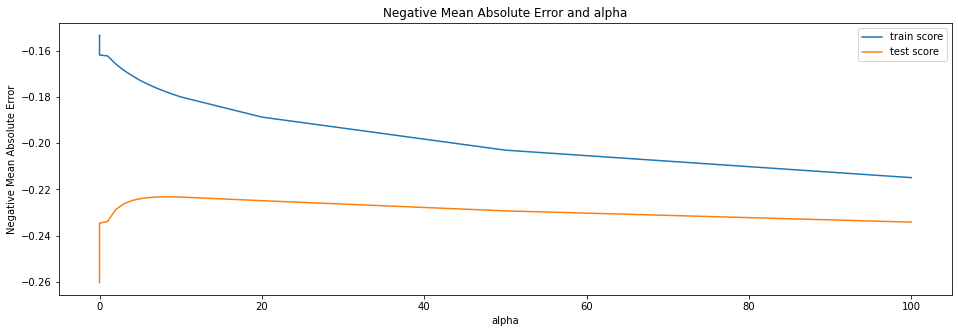

In [42]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [43]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

Ridge(alpha=10)

array([[ 1.99492014e-02,  7.78656288e-02,  1.47157695e-01,
         8.53305083e-02,  6.07334710e-03,  1.72996551e-03,
         2.68581683e-02,  9.98958249e-02,  4.44359750e-03,
         9.71377932e-03,  1.25620605e-01,  5.25096230e-02,
         1.65760159e-01, -2.02875439e-02,  1.99823745e-01,
         5.34969366e-02, -5.57461194e-02,  2.26913767e-02,
         2.47420117e-02,  7.77601802e-04,  7.20797287e-02,
         2.04605726e-05,  6.23263159e-02,  6.51467024e-02,
         4.56631778e-02,  3.33505785e-02,  9.82487873e-03,
         8.05412194e-03,  1.92200430e-02,  0.00000000e+00,
         1.08736488e-02, -3.99069526e-03, -8.86360455e-03,
        -3.17569590e-02,  1.63779137e-01, -3.75973044e-03,
        -1.33429849e-01, -1.15503773e-01, -5.36628791e-02,
        -3.24889143e-02,  2.58258925e-02, -2.85883137e-02,
        -1.44997822e-02,  9.20581441e-02, -5.37238332e-02,
        -7.36722524e-02, -1.61838533e-02, -1.81942336e-02,
         6.29455485e-02, -7.52035276e-02, -3.62997352e-0

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024213,0.004634,0.011791,0.004069,0.0001,{'alpha': 0.0001},-0.258661,-0.244855,-0.268195,-0.275141,-0.253988,-0.260168,0.010617,26,-0.151665,-0.159731,-0.151834,-0.150272,-0.153989,-0.153498,0.003336
1,0.029992,0.003456,0.011392,0.002154,0.001,{'alpha': 0.001},-0.259213,-0.243333,-0.268392,-0.274877,-0.252444,-0.259652,0.011195,25,-0.151631,-0.159678,-0.151767,-0.150358,-0.153773,-0.153441,0.003304
2,0.024184,0.003057,0.010194,0.001470,0.01,{'alpha': 0.01},-0.259331,-0.240843,-0.266902,-0.272751,-0.250720,-0.258109,0.011366,24,-0.152037,-0.160073,-0.151923,-0.150861,-0.154125,-0.153804,0.003308
3,0.026985,0.002098,0.010996,0.002451,0.05,{'alpha': 0.05},-0.256823,-0.235330,-0.261897,-0.267718,-0.248462,-0.254046,0.011294,23,-0.153139,-0.161262,-0.152696,-0.152600,-0.154984,-0.154936,0.003278
4,0.028541,0.004562,0.013594,0.003325,0.1,{'alpha': 0.1},-0.254076,-0.231160,-0.257861,-0.264360,-0.245583,-0.250608,0.011465,22,-0.154166,-0.162598,-0.153493,-0.154158,-0.155704,-0.156024,0.003366
5,0.025591,0.001747,0.011790,0.002395,0.2,{'alpha': 0.2},-0.250151,-0.226943,-0.252719,-0.260084,-0.241044,-0.246188,0.011387,21,-0.155558,-0.164278,-0.154825,-0.155925,-0.156698,-0.157457,0.003464
6,0.025956,0.002112,0.010588,0.000486,0.3,{'alpha': 0.3},-0.247819,-0.223790,-0.249236,-0.257246,-0.238342,-0.243286,0.011449,20,-0.156507,-0.165364,-0.155838,-0.157038,-0.157476,-0.158444,0.003503
7,0.024383,0.003712,0.008194,0.002925,0.4,{'alpha': 0.4},-0.246607,-0.221232,-0.246517,-0.254911,-0.236396,-0.241133,0.011552,19,-0.157210,-0.166212,-0.156726,-0.157819,-0.158124,-0.159218,0.003530
8,0.020789,0.006108,0.008993,0.001897,0.5,{'alpha': 0.5},-0.245593,-0.219050,-0.244300,-0.252874,-0.234901,-0.239344,0.011647,18,-0.157759,-0.166990,-0.157506,-0.158384,-0.158680,-0.159864,0.003588
9,0.018023,0.003171,0.009801,0.002716,0.6,{'alpha': 0.6},-0.244980,-0.217229,-0.242607,-0.251216,-0.233635,-0.237933,0.011791,17,-0.158224,-0.167687,-0.158208,-0.158870,-0.159197,-0.160437,0.003645


In [45]:
# calculate metrics
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(rmse_train_lr)
metric2.append(rmse_train_lr)

rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(rmse_test_lr)
metric2.append(rmse_test_lr)

0.9385763079641685
0.9066416001500114
58.905320662362406
22.45321468918164
0.24783803589407236
0.30586771847470845


In [46]:
# R squared value
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9385763079641685


In [47]:
# prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9066416001500114


In [48]:
# RMSE value 
mean_squared_error(y_test, y_test_pred)

0.09355506120492349

## Lasso Regression

In [49]:
# lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
model_cv.best_params_

{'alpha': 0.001}

In [51]:
cv_results_l = pd.DataFrame(model_cv.cv_results_)

In [52]:
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

Lasso(alpha=0.002)

array([ 1.49937437e-02,  7.75733770e-02,  1.53358501e-01,  8.79572197e-02,
        6.76021228e-03,  1.56640893e-03,  1.96041535e-02,  8.84195534e-02,
        0.00000000e+00, -0.00000000e+00,  1.07454541e-01,  0.00000000e+00,
        5.30369187e-02, -2.25291970e-02,  3.05814720e-01,  4.79787585e-02,
       -3.02092023e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.20896788e-02,  1.67946630e-05,  4.49257729e-02,  7.93695048e-02,
        4.57725762e-02,  3.25390469e-02,  8.01549388e-03,  4.61574714e-03,
        1.77862127e-02,  0.00000000e+00,  4.52170799e-03, -2.68326918e-03,
       -0.00000000e+00, -0.00000000e+00,  2.32852108e-01, -0.00000000e+00,
       -1.19867210e-01, -1.12349849e-01, -3.25911911e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.47480453e-02,
       -7.88438530e-04, -3.37608444e-02,  0.00000000e+00, -0.00000000e+00,
        5.91560060e-02, -7.48810983e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [53]:
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(10).ColumnName.values


array(['Neighborhood_Crawfor', 'GrLivArea', 'KitchenAbvGr_1',
       'Neighborhood_Somerst', 'BsmtQual_Ex', 'Neighborhood_NridgHt',
       'Neighborhood_NoRidge', 'Exterior1st_BrkFace', 'OverallQual',
       'Functional_Typ'], dtype=object)

In [54]:
pd.DataFrame(zip(X_train.columns[lasso.coef_ > 0], lasso.coef_[lasso.coef_ > 0]), columns=['ColumnName', 'Coeff']).sort_values('Coeff', ascending=False).head(10)


,ColumnName,Coeff
33,Neighborhood_Crawfor,0.375112
10,GrLivArea,0.305815
47,KitchenAbvGr_1,0.270227
36,Neighborhood_Somerst,0.249857
22,BsmtQual_Ex,0.232852
35,Neighborhood_NridgHt,0.208741
34,Neighborhood_NoRidge,0.186251
41,Exterior1st_BrkFace,0.170720
2,OverallQual,0.153359
48,Functional_Typ,0.145310


In [55]:
# calculate metrics

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(rmse_train_lr)
metric3.append(rmse_train_lr)

rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(rmse_test_lr)
metric3.append(rmse_test_lr)

0.9285737578085143
0.904752610666862
1752775.7107886786
107750.96342569546
0.2672568842733255
0.3089466456891431


In [56]:
lr_table = {
    'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)'], 
}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric['Ridge Regression'] = final_metric['Ridge Regression'].apply(lambda x: np.round(x, decimals=3))
final_metric['Lasso Regression'] = final_metric['Lasso Regression'].apply(lambda x: np.round(x, decimals=3))
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.939,0.929
1,R2 Score (Test),0.907,0.905
2,RSS (Train),58.905,1752775.711
3,RSS (Test),22.453,107750.963
4,RMSE (Train),0.248,0.267
5,RMSE (Test),0.306,0.309


Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Negative Mean Absolute Error')

Text(0.5, 1.0, 'Negative Mean Absolute Error and alpha')

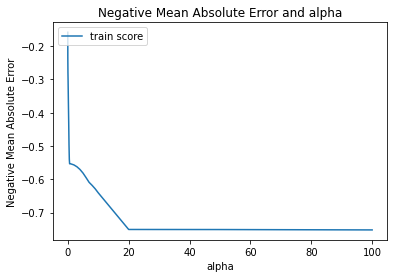

In [57]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [58]:
#r squared for train data 
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9285737578085143


In [59]:
# r squared for test data 
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.904752610666862


In [60]:
mean_squared_error(y_test, y_test_pred)

0.09544802988257294

In [62]:
model_cv.best_params_

{'alpha': 0.001}

## Question and Answer part coding

In [67]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

Ridge(alpha=20)

array([[ 2.41764799e-02,  7.81608303e-02,  1.55078952e-01,
         8.79145073e-02,  5.98614783e-03,  1.64392588e-03,
         3.06789278e-02,  9.83238724e-02,  1.33623227e-03,
         7.13507479e-03,  1.19599729e-01,  6.13546006e-02,
         1.50010887e-01, -2.11076820e-02,  1.90880882e-01,
         5.27452094e-02, -5.10279568e-02,  2.14403557e-02,
         2.48056123e-02,  2.25239314e-03,  6.89765918e-02,
         1.91123281e-05,  5.50579725e-02,  7.19053642e-02,
         4.54971254e-02,  3.62237976e-02,  1.05068697e-02,
         8.57856604e-03,  1.92536610e-02,  0.00000000e+00,
         8.33099504e-03, -4.52865126e-03, -1.18325534e-02,
        -2.16479281e-02,  1.59254748e-01,  1.28374253e-03,
        -1.19415924e-01, -1.04462767e-01, -4.13978824e-02,
        -1.94136648e-02,  1.13494183e-02, -1.38780720e-02,
        -9.27142945e-03,  7.36632514e-02, -4.30685222e-02,
        -6.54919742e-02, -1.52943406e-02, -1.57154003e-02,
         5.82810703e-02, -5.12814007e-02, -2.93935121e-0

In [68]:
#doubling alpha
alpha =0.004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.004)

In [69]:
lasso.coef_

array([ 2.04641541e-02,  8.06917198e-02,  1.66998473e-01,  8.71041387e-02,
        6.55817337e-03,  1.37190133e-03,  1.90035688e-02,  9.15002777e-02,
        0.00000000e+00, -0.00000000e+00,  9.74483813e-02,  0.00000000e+00,
        2.21406060e-02, -2.13940809e-02,  3.11192778e-01,  4.27746632e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.55649690e-02,  1.57497107e-05,  1.99973471e-02,  9.79760317e-02,
        4.10254346e-02,  3.58293099e-02,  6.60876081e-03,  6.57828508e-03,
        1.54155588e-02,  0.00000000e+00,  4.26936121e-04, -2.00673833e-03,
       -0.00000000e+00, -0.00000000e+00,  3.04833211e-01,  0.00000000e+00,
       -4.19342274e-02, -5.51417191e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.25782867e-02,
       -0.00000000e+00, -3.67932898e-02, -0.00000000e+00, -0.00000000e+00,
        4.97707395e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [70]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=275)

In [72]:
X_train =X_train.drop(['OverallQual', 'GarageCars', 'TotRmsAbvGrd','CentralAir_Y','BsmtExposure_Gd'], axis = 1)

In [74]:
#By Ridge
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
alpha =10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Ridge(alpha=10)

array([[ 2.24418527e-02,  7.14649611e-02,  1.07279678e-01,
         8.15717824e-03,  1.66539995e-03,  3.14376142e-02,
         1.07926255e-01,  1.17769650e-02,  1.73583581e-02,
         1.46548910e-01,  6.37041202e-02,  1.85341746e-01,
        -1.07213228e-02,  2.27367738e-01,  4.68809907e-02,
        -6.52171256e-02,  2.93751003e-02,  2.14276196e-02,
         8.77681491e-02,  1.66481977e-05,  1.04998955e-01,
         4.66642174e-02,  3.43540808e-02,  1.57918770e-02,
         1.23818182e-02,  2.44410116e-02,  0.00000000e+00,
         1.36382163e-02, -4.06546295e-03, -1.45912065e-02,
        -1.23257044e-02,  2.04049685e-01, -2.82351410e-02,
        -1.18136765e-01, -1.14640423e-01, -4.53874312e-02,
        -1.26386508e-02,  2.17788010e-02, -2.07153621e-02,
        -6.01384999e-02, -1.00143908e-01, -1.29861496e-01,
        -3.68015948e-02, -1.79708327e-02,  8.16857597e-02,
        -6.68200283e-02, -3.72901306e-02,  2.02341837e-02,
         4.78941521e-03, -4.29931018e-02,  1.72379847e-0

In [75]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
lasso.coef_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Lasso(alpha=0.002)

array([ 1.38802411e-02,  7.02706124e-02,  1.08277912e-01,  8.50655331e-03,
        1.59162653e-03,  3.02787413e-02,  7.65439609e-02, -0.00000000e+00,
        0.00000000e+00,  1.37574239e-01,  0.00000000e+00,  5.70678875e-02,
       -1.32148731e-02,  3.52289768e-01,  3.27180828e-02, -4.18438071e-02,
        5.64779779e-03,  0.00000000e+00,  8.71435377e-02,  1.28312672e-05,
        1.11002821e-01,  4.63440802e-02,  3.09512051e-02,  1.35751063e-02,
        8.47612846e-03,  2.12815519e-02,  0.00000000e+00,  6.66655789e-03,
       -4.06217351e-03, -0.00000000e+00, -0.00000000e+00,  3.53918101e-01,
        0.00000000e+00, -3.82141753e-02, -5.21112642e-02, -2.39539380e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.22361553e-02,
       -4.05683320e-02, -7.25011446e-02, -1.93344452e-03, -0.00000000e+00,
        8.73732454e-02, -3.70982485e-04, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [76]:
m=list(lasso.coef_)
m

[0.013880241071368425,
 0.07027061244203876,
 0.1082779119678156,
 0.008506553312269583,
 0.001591626532340287,
 0.030278741288520365,
 0.07654396086812597,
 -0.0,
 0.0,
 0.13757423929513823,
 0.0,
 0.05706788751094616,
 -0.013214873064863854,
 0.35228976781890936,
 0.032718082770890874,
 -0.0418438071186858,
 0.005647797793546744,
 0.0,
 0.08714353766430545,
 1.2831267246309463e-05,
 0.11100282139473644,
 0.046344080175936976,
 0.03095120507530427,
 0.013575106323132899,
 0.00847612845638144,
 0.021281551945944038,
 0.0,
 0.006666557890191636,
 -0.004062173512314975,
 -0.0,
 -0.0,
 0.3539181012994274,
 0.0,
 -0.03821417528605606,
 -0.05211126422821708,
 -0.023953937972305852,
 -0.0,
 0.0,
 0.0,
 -0.02223615531775725,
 -0.040568332002294816,
 -0.07250114457657628,
 -0.0019334445197464272,
 -0.0,
 0.0873732453847531,
 -0.0003709824853992053,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.00449414421993412,
 0.0011059674103580035,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,


In [79]:
#For finding the variables with highest-valued coefficients
sorted(list(lasso.coef_),reverse=True)

[0.40942166739308067,
 0.3539181012994274,
 0.35228976781890936,
 0.3401261844533237,
 0.29026637976992437,
 0.22778289373279736,
 0.1993484756768133,
 0.1839916563459454,
 0.17471953184992592,
 0.14744434408028187,
 0.13757423929513823,
 0.1179745957931244,
 0.1179228190691363,
 0.11100282139473644,
 0.1082779119678156,
 0.09583507546362517,
 0.0958170507644367,
 0.08772030176553068,
 0.0873732453847531,
 0.08714353766430545,
 0.08520841703764229,
 0.07654396086812597,
 0.07027061244203876,
 0.06282159412898967,
 0.05706788751094616,
 0.046344080175936976,
 0.03737256673421432,
 0.032718082770890874,
 0.03095120507530427,
 0.030278741288520365,
 0.026816412925509642,
 0.024488205927875845,
 0.0239274014193751,
 0.021281551945944038,
 0.01841010078657959,
 0.017594220863725675,
 0.016213181352892642,
 0.015324654999236968,
 0.013880241071368425,
 0.013575106323132899,
 0.010574761411334175,
 0.008506553312269583,
 0.00847612845638144,
 0.007050465443265412,
 0.006666557890191636,
 0.00

In [81]:
for index, value in enumerate(list(X_train.columns)): 
    print(index, value)

0 LotFrontage
1 LotArea
2 OverallCond
3 YearBuilt
4 YearRemodAdd
5 MasVnrArea
6 BsmtFinSF1
7 BsmtFinSF2
8 BsmtUnfSF
9 TotalBsmtSF
10 1stFlrSF
11 2ndFlrSF
12 LowQualFinSF
13 GrLivArea
14 BsmtFullBath
15 BsmtHalfBath
16 FullBath
17 HalfBath
18 Fireplaces
19 GarageYrBlt
20 GarageArea
21 WoodDeckSF
22 OpenPorchSF
23 EnclosedPorch
24 3SsnPorch
25 ScreenPorch
26 PoolArea
27 MiscVal
28 YrSold
29 Alley_Grvl
30 Alley_Pave
31 BsmtQual_Ex
32 BsmtQual_Fa
33 BsmtQual_Gd
34 BsmtQual_TA
35 BsmtCond_Fa
36 BsmtCond_Gd
37 BsmtCond_Po
38 BsmtCond_TA
39 BsmtExposure_Av
40 BsmtExposure_Mn
41 BsmtExposure_No
42 BsmtFinType1_ALQ
43 BsmtFinType1_BLQ
44 BsmtFinType1_GLQ
45 BsmtFinType1_LwQ
46 BsmtFinType1_Rec
47 BsmtFinType1_Unf
48 BsmtFinType2_ALQ
49 BsmtFinType2_BLQ
50 BsmtFinType2_GLQ
51 BsmtFinType2_LwQ
52 BsmtFinType2_Rec
53 BsmtFinType2_Unf
54 FireplaceQu_Ex
55 FireplaceQu_Fa
56 FireplaceQu_Gd
57 FireplaceQu_Po
58 FireplaceQu_TA
59 GarageType_2Types
60 GarageType_Attchd
61 GarageType_Basment
62 GarageTyp